# Setup package & read dataframe <a class="anchor" id="setup_package"></a>

In [2]:
#import package
import pandas as pd
import numpy as np
import seaborn as sns
import polars as pl
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("vgchartz-2024.csv")

this dataset is from : https://mavenanalytics.io/data-playground

In [4]:
df.columns

Index(['img', 'title', 'console', 'genre', 'publisher', 'developer',
       'critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales',
       'other_sales', 'release_date', 'last_update'],
      dtype='object')

## Column Description

- title: video game title
- console: game console was released for
- genre: genre of the game
- publisher: video game publisher name
- developer: developer of the game
- critic_score: metacritic of the game (0 of 10)
- total_sales : global sales of copies (in million)
- na_sales : north american sales of copies (in million)
- pal_sales: europe and africe sales of copies (in million)
- jp_sales: japan sales of copies (in million)
- other_sales: other regions of copies (in million)
- release_date: date of the game was released on
- last_update: date the data was last updated

# Data checking & Preparation <a class="anchor" id="Data checking & Preparation"></a>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB


In [6]:
df.describe(include='all')

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
count,64016,64016,64016,64016,64016,63999,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000,56965,17879
unique,56177,39798,81,20,3383,8862,NaN,NaN,NaN,NaN,NaN,NaN,7922,1545
top,/games/boxart/default.jpg,Plants vs. Zombies,PC,Misc,Unknown,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,1994-01-01,2018-01-06
freq,7810,17,12617,9304,8842,4435,NaN,NaN,NaN,NaN,NaN,NaN,515,165
mean,NaN,NaN,NaN,NaN,NaN,NaN,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000,NaN,NaN


In [7]:
df.isna().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64

There are plenty of null data occurs within the dataset, from `critic_score` up to `last_update` columns

# Data Processing <a class = "anchor" id = "Data Processing"></a>

## Remove Columns <a class="anchor" id="Data checking & Preparation"></a>

Remove unnecesarry columns:
- `img column` will not be useful within the dataframe
- `last_update` doesn't representing anything

In [8]:
#drop the img column
df.drop(columns= ['img','last_update'], axis=1, inplace=True)

In [9]:
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06


Since our concern is mainly on `total sales`, the empty rows will be dropped. Followed by other columns that will be analyzed.

In [10]:
#drop the rows where the total sales number is empty
df.dropna(how='any', subset=['total_sales', 'developer', 'release_date'],axis=0, inplace=True)


## Change Date Format & Filter Data by N years

In [11]:
#change release date data format
df['release_date'] = pd.to_datetime(df['release_date'], format='%Y-%m-%d')
df['release_year'] = df['release_date'].dt.year

In [12]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18829 entries, 0 to 18921
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         18829 non-null  object        
 1   console       18829 non-null  object        
 2   genre         18829 non-null  object        
 3   publisher     18829 non-null  object        
 4   developer     18829 non-null  object        
 5   critic_score  4123 non-null   float64       
 6   total_sales   18829 non-null  float64       
 7   na_sales      12618 non-null  float64       
 8   jp_sales      6688 non-null   float64       
 9   pal_sales     12774 non-null  float64       
 10  other_sales   15068 non-null  float64       
 11  release_date  18829 non-null  datetime64[ns]
 12  release_year  18829 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(1), object(5)
memory usage: 1.9+ MB


In [13]:
#published game for each year
df['release_year'].value_counts(ascending=False).head(20)

release_year
2009    1753
2008    1623
2010    1381
2007    1268
2011    1252
2006    1047
2005     979
2002     850
2003     820
2004     782
2012     694
2017     689
2018     660
2015     640
2014     630
2016     612
2013     514
2001     508
2000     397
1999     335
Name: count, dtype: int64

Since we have `long period of years`, we can filter out the year published within the dataframe

In [14]:
#before filter
print(f"before filtered total data: {len(df)}")

before filtered total data: 18829


In [15]:
# filter data from 1999 up to 2020
df = df[df['release_year']>=1999]

#after filter
print(f"after filtered, total data: {len(df)}")


after filtered, total data: 17497


## Grouping the Console by Brand

In [16]:
#checking data console
df['console'].value_counts()

console
DS      2374
PS2     2120
PC      1515
Wii     1345
PS3     1340
PSP     1329
X360    1294
PS4      908
GBA      898
XB       836
PSV      678
3DS      560
PS       559
GC       526
XOne     524
NS       262
N64      165
WiiU     148
DC        47
GB        24
PSN       14
XBL        8
WS         7
VC         6
GBC        3
WW         2
SAT        2
SNES       1
OSX        1
Mob        1
Name: count, dtype: int64

In [17]:
#create new colum for device group
df.loc[(df['console'].isin(['DS','Wii', '3DS', 'WiiU', 'N64', 'NS', 'GBA', '3DS']), 'console_brand')] = 'Nintendo'
df.loc[(df['console'].isin(['PS2','PS3', 'PSP', 'PS4', 'PSV', 'PS','PSN'  ]), 'console_brand')] = 'PlayStation'
df.loc[(df['console'].isin(['X360','XB', 'XOne' , 'XBL']), 'console_brand')] = 'XBOX'
df.loc[(df['console'].isin(['GBA','DC', 'GB' ]), 'console_brand')] = 'Other'

df['console_brand'] = df['console_brand'].fillna('Other')

# Exploratory Data Analysis <a class="anchor" id="eda"></a>

## Overview data

array([[<Axes: title={'center': 'critic_score'}>,
        <Axes: title={'center': 'total_sales'}>,
        <Axes: title={'center': 'na_sales'}>],
       [<Axes: title={'center': 'jp_sales'}>,
        <Axes: title={'center': 'pal_sales'}>,
        <Axes: title={'center': 'other_sales'}>],
       [<Axes: title={'center': 'release_date'}>,
        <Axes: title={'center': 'release_year'}>, <Axes: >]], dtype=object)

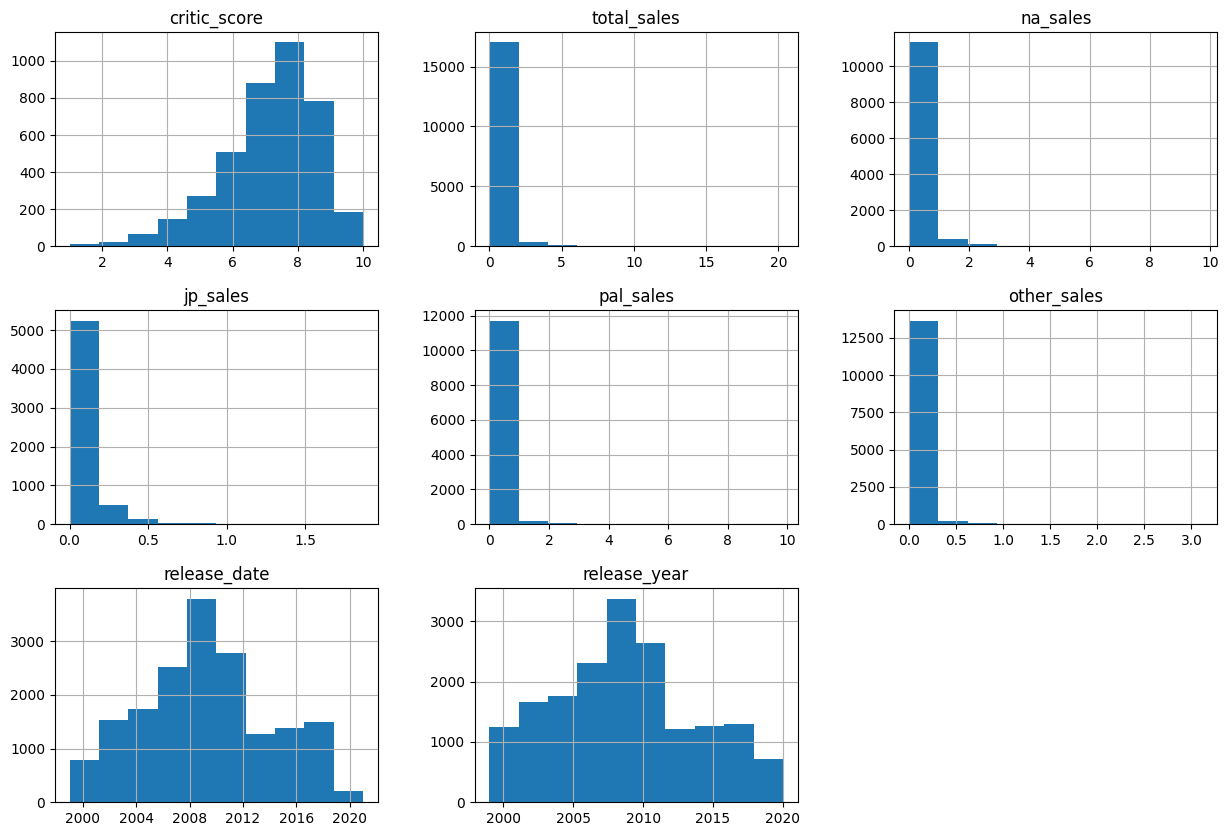

In [18]:
#get overview distribution of numerical data

fig = plt.figure(figsize= (15, 10))
ax = fig.gca()
df.hist(ax=ax)

- the sales overall data is highly distributed below 1 million sales. 
- while the total sales distribution is skewed right followed by each regions sales

>we could identify the distribution of popular & unpopular game within the overall video game sales

## Univariate analysis

In [19]:
df.columns

Index(['title', 'console', 'genre', 'publisher', 'developer', 'critic_score',
       'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales',
       'release_date', 'release_year', 'console_brand'],
      dtype='object')

In [20]:
df.sample(n=3, random_state=25)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,release_year,console_brand
13603,National Geographic Challenge!,PS3,Misc,Ignition Entertainment,Gusto Games,NaN,0.04,0.01,NaN,0.03,0.01,2011-11-29,2011,PlayStation
9414,Sega Soccer Slam,PS2,Sports,Sega,Black Box Games,NaN,0.12,0.06,NaN,0.05,0.02,2002-09-02,2002,PlayStation
10789,Skies of Arcadia,DC,Role-Playing,Sega,Overworks,9.2,0.09,NaN,0.09,NaN,NaN,2000-11-13,2000,Other


> `Sales` is the primary table that needs to be analyzed with other complimentary variables such as `critic_score, console_brand, genre & publisher tables`

### Critic score data distribution

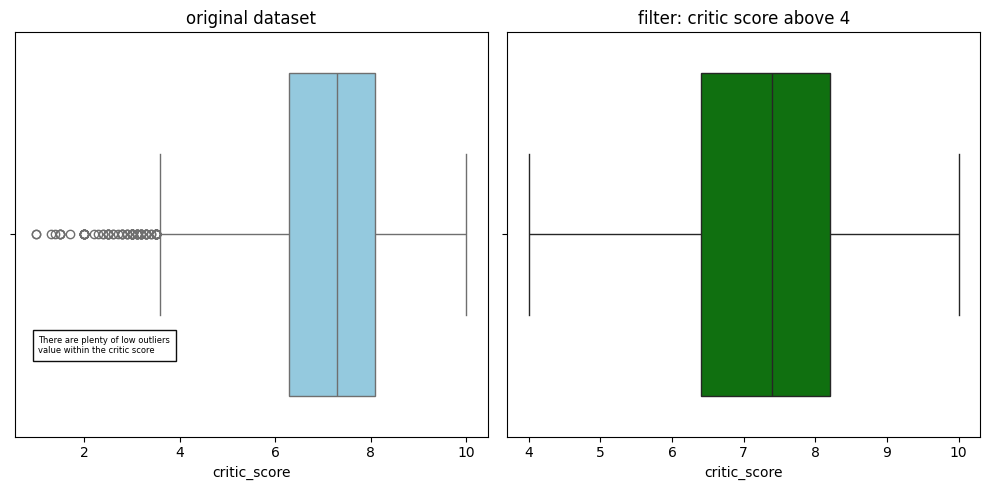

In [21]:
#critic score
fig, axes = plt.subplots(1,2,figsize= (10,5))

#without filter
sns.boxplot(x = 'critic_score', ax= axes[0], data = df, color = 'skyblue')
axes[0].set_title('original dataset')
summary = "There are plenty of low outliers\nvalue within the critic score"
axes[0].text(0.05, 0.25,summary,transform=axes[0].transAxes, fontsize = 6, 
             verticalalignment = 'top', bbox = dict(facecolor = 'white', alpha= 0.95))


#after filter
sns.boxplot(x = 'critic_score', ax= axes[1], data = df[df['critic_score']>=4], color= 'green')
axes[1].set_title('filter: critic score above 4')

plt.tight_layout()
plt.show()

Critic score has median value on: 7.3
Critic score has IQR value on: 1.80
Critic score has standard deviation value on: 1.43


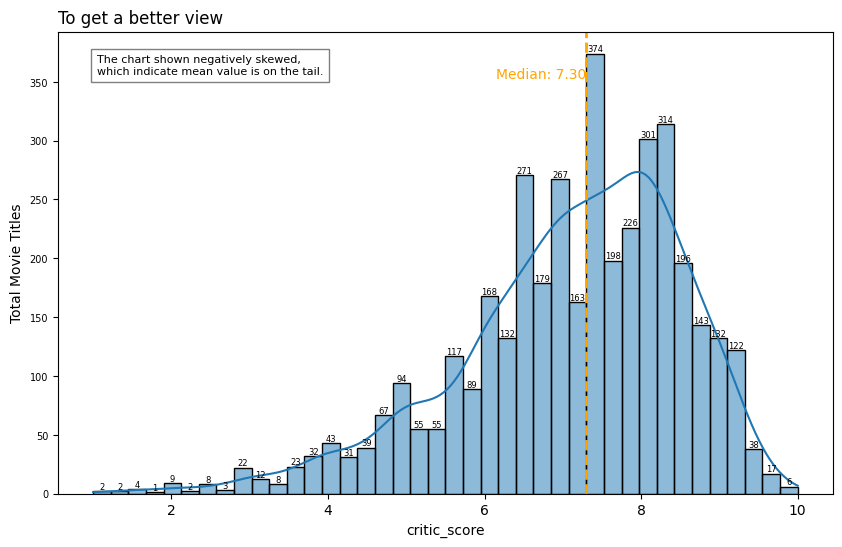

In [22]:
score_median = df['critic_score'].median()
score_stdev = df['critic_score'].std()
score_q1 = df['critic_score'].quantile(0.25)
score_q3 = df['critic_score'].quantile(0.75)
IQR = score_q3 - score_q1


fig = plt.figure(figsize=(10,6))
ax = sns.histplot(data= df, x='critic_score', kde = True)
ax.set_title('To get a better view', loc ='left')
ax.set_ylabel('Total Movie Titles')
#set the y labels size
ax.set_yticklabels(ax.get_yticklabels(),fontsize = 7)


for i in ax.containers:
    ax.bar_label(i, fontsize  = 6)
    
#to get median line
plt.axvline(score_median, color = 'orange', ls = '--', lw = 2)
#to annotate the median value
plt.text(score_median, plt.gca().get_ylim()[1]*0.9, f'Median: {score_median:.2f}', 
         color='orange', ha='right')

#annotate summary
summary = (f'The chart shown negatively skewed,\n'
           f'which indicate mean value is on the tail.')
plt.text(0.05, 0.95, summary, transform=plt.gca().transAxes, fontsize=8,
         verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
        
    
print(f"Critic score has median value on: {score_median}")
print(f"Critic score has IQR value on: {IQR:.2f}")
print(f"Critic score has standard deviation value on: {score_stdev:.2f}")


We can filter the data out if needed to show only critic score 3 and above. or match the total sales data compared to available critic score data.

### total sales data distribution

In [23]:
df['total_sales'].describe()

count    17497.000000
mean         0.343914
std          0.822096
min          0.000000
25%          0.030000
50%          0.110000
75%          0.330000
max         20.320000
Name: total_sales, dtype: float64

video game with total sales above 5 million: 88


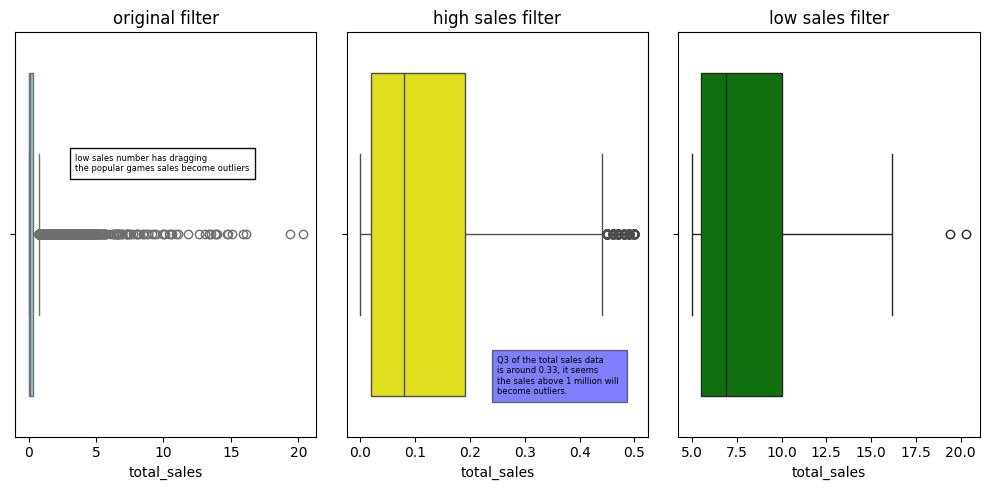

In [24]:
#total sales

fig, axes = plt.subplots(1,3, figsize= (10,5))

summary1 = 'low sales number has dragging\nthe popular games sales become outliers'
sns.boxplot(x='total_sales', ax= axes[0], data = df, color= 'skyblue')
axes[0].set_title('original filter')
axes[0].text(0.20,0.7, summary1, transform=axes[0].transAxes,fontsize = 6,
             verticalalignment = 'top', bbox = dict(facecolor = 'white', alpha = 0.95))

#filter: keep low total sales only
summary2 = 'Q3 of the total sales data\nis around 0.33, it seems\nthe sales above 1 million will \nbecome outliers.'
sns.boxplot(x = 'total_sales', ax = axes[1], data = df[df['total_sales']<= 0.5], color = 'yellow')
axes[1].set_title('high sales filter')
axes[1].text(0.5, 0.2, summary2, transform=axes[1].transAxes, fontsize = 6, 
             verticalalignment = 'top', bbox = dict(facecolor = 'blue', alpha = 0.5))

#filter: keep high total sales
sns.boxplot(x='total_sales', ax= axes[2], data = df[df['total_sales']>=5], color= 'green')
axes[2].set_title('low sales filter')

print(f"video game with total sales above 5 million: {len(df[df['total_sales']>5])}")
plt.tight_layout()
plt.show()

For the total sales, we have to be more carefull to decide whether to remove the popular game or keep it, cause of only 88 games who has sales above 5 million from 17 thousands row of dataset.

However, since we want to identify the sales performance, we will keep as it stands within the data set.

### Game Genre distribution

In [25]:
#checking game genre variables
df['genre'].value_counts()

genre
Action              2675
Sports              2346
Misc                1904
Adventure           1810
Role-Playing        1381
Shooter             1339
Racing              1313
Simulation          1063
Platform             863
Strategy             733
Fighting             719
Puzzle               655
Action-Adventure     264
Visual Novel         218
Music                147
MMO                   30
Party                 29
Education              4
Board Game             3
Sandbox                1
Name: count, dtype: int64

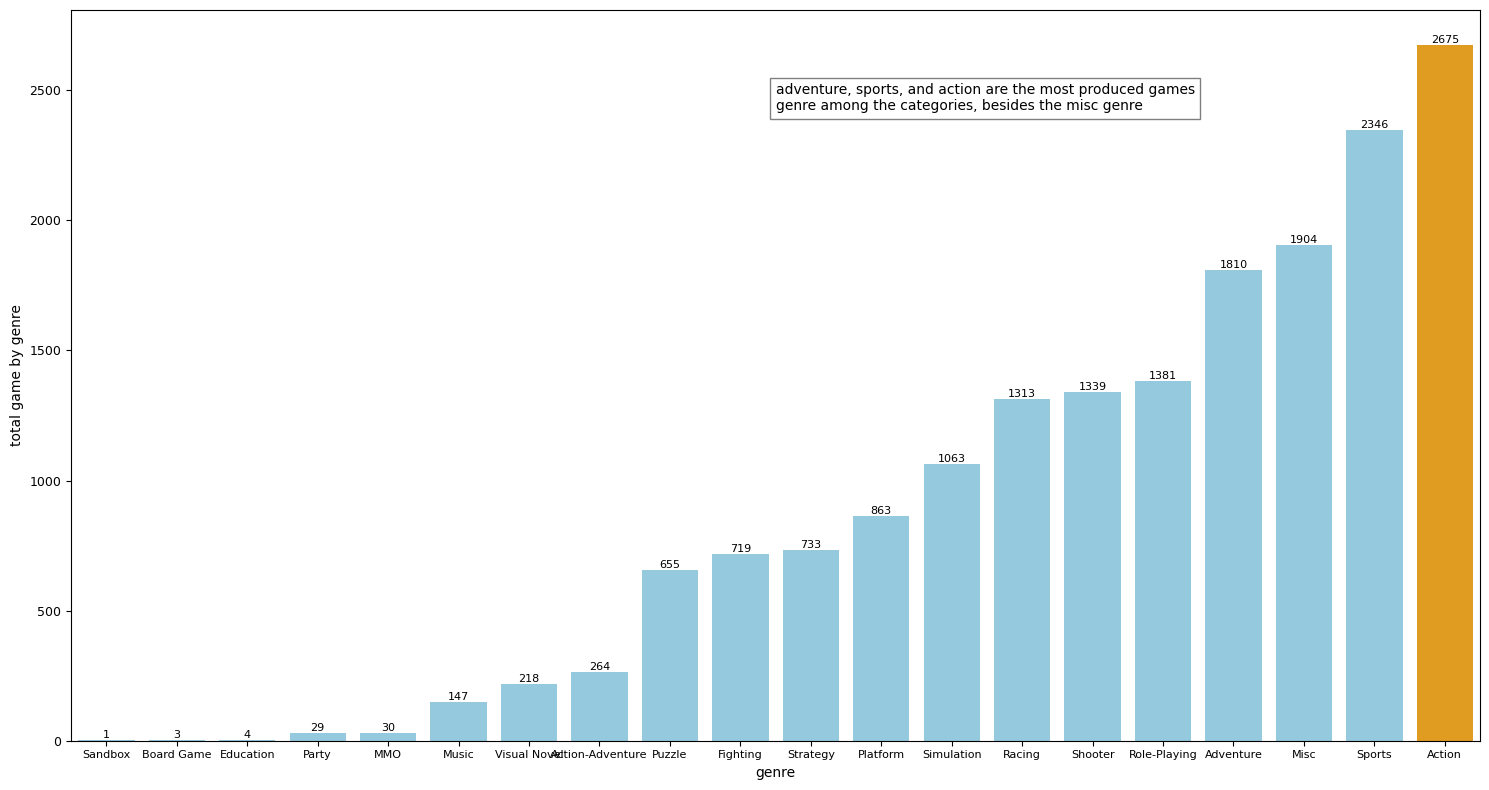

In [26]:
fig = plt.figure(figsize=(15,8))

max_genre = df['genre'].value_counts().idxmax()

#highlight color
max_color = ['skyblue' if color != max_genre else 'orange' for color in df['genre'].value_counts().sort_values().index]

ax = sns.countplot(x = 'genre', data = df, order = df['genre'].value_counts().sort_values().index, palette = max_color)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 8)
ax.tick_params(axis = 'y', labelsize = 9)
ax.set_ylabel('total game by genre')
summary_genre = "adventure, sports, and action are the most produced games\ngenre among the categories, besides the misc genre"
ax.text(0.50, 0.90, summary_genre, transform = ax.transAxes, fontsize = 10,
        verticalalignment = 'top',bbox= dict(facecolor = 'white', alpha=0.50))

for i in ax.containers:
    ax.bar_label(i, fontsize = 8)

plt.tight_layout()
plt.show()

> `Action, Sports and Adventure` (exclud misc) are the main categories for games genre, we can explore further for those popular genre for its total sales among the genre total sales later on.

### Year game published distribution

[Text(2013, 0, '2013'),
 Text(2014, 0, '2014'),
 Text(2002, 0, '2002'),
 Text(2015, 0, '2015'),
 Text(2011, 0, '2011'),
 Text(2010, 0, '2010'),
 Text(2018, 0, '2018'),
 Text(2012, 0, '2012'),
 Text(2009, 0, '2009'),
 Text(2017, 0, '2017'),
 Text(2001, 0, '2001'),
 Text(2008, 0, '2008'),
 Text(2016, 0, '2016'),
 Text(2007, 0, '2007'),
 Text(2005, 0, '2005'),
 Text(2003, 0, '2003'),
 Text(2004, 0, '2004'),
 Text(1999, 0, '1999'),
 Text(2006, 0, '2006'),
 Text(2000, 0, '2000'),
 Text(2019, 0, '2019'),
 Text(2020, 0, '2020')]

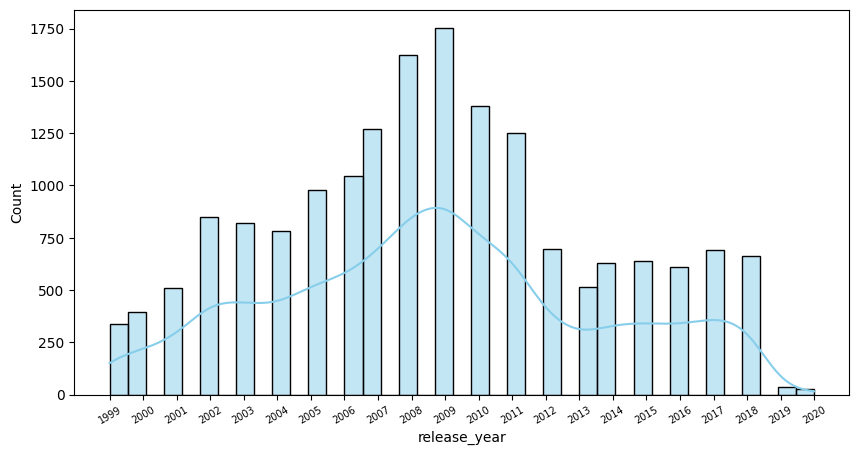

In [27]:
plt.figure(figsize=(10,5))

ax = sns.histplot(data = df, x = 'release_year', color= 'skyblue', kde= True)
ax.set_xticks(df['release_year'].unique())
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 7, rotation = 30)

- we can assume due incomplete data, we can remove the 2019 and 2020 data within the dataset 
- meanwhile we can see there is a declining trend upon 2009 & 2010 for video game published from the dataset.

In [28]:
df['genre'].value_counts()

genre
Action              2675
Sports              2346
Misc                1904
Adventure           1810
Role-Playing        1381
Shooter             1339
Racing              1313
Simulation          1063
Platform             863
Strategy             733
Fighting             719
Puzzle               655
Action-Adventure     264
Visual Novel         218
Music                147
MMO                   30
Party                 29
Education              4
Board Game             3
Sandbox                1
Name: count, dtype: int64

> as depicted, there are a few genres produced more than the others. but it can be explored further to see the genre sales compared to total sales.

### Publisher Distribution

In [29]:
df_pub = df['publisher'].value_counts().reset_index()
df_pub

,publisher,count
0,Ubisoft,1004
1,Activision,1001
2,Electronic Arts,802
3,THQ,711
4,Konami,687
...,...,...
633,Visco,1
634,Epic Games,1
635,Arika,1
636,Phantom EFX,1


In [30]:
print(f"total unique publishers: {len(df_pub['publisher'].unique())}")
print(f"number of publisher more than 100 games: {len(df_pub[df_pub['count']>100])}")
print(f"number of publisher less than 100 games: {len(df_pub[df_pub['count']<100])}")

total unique publishers: 638
number of publisher more than 100 games: 41
number of publisher less than 100 games: 597


### Additional data cleansing steps:

after the data investigation process, we may do some filtering processess, such as:
- remove the low metacritics score.
- remove the 2019 & 2020 dataset, due to unavailability / small quantity of data.
- for the total sales record, there might be few of outliers data, however we want to keep it as comparion object for the popular and unpopular game distribution.
- we dont have to do anything with the genre variable, instead we can explore further to compare the total sales and critic score correlation.
- for comparison aspect, we don't have to drop or remove the publisher, as we want to compare the publisher towards the total sales.

## bivariate analysis

> Same as before, we will focus in analyzing `critic_score, console_brand, year, genre & publisher`
compared to Sales tables which includes `Total Sales, American, Japan & Other Region Sales`

In [31]:
#setup new clean data for better analysis based on the univariate analysis output
df_clean = df[(df['critic_score']>2) & (df['release_year']<2019)]

In [32]:
df_clean.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,release_year
count,3944.000000,3944.000000,3590.000000,1336.000000,3625.000000,3840.000000,3944,3944.000000
mean,7.123732,0.742305,0.417357,0.100487,0.266143,0.085781,2008-04-15 06:00:43.813387264,2007.714503
min,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1999-01-01 00:00:00,1999.000000
25%,6.300000,0.110000,0.080000,0.020000,0.020000,0.010000,2005-05-16 00:00:00,2005.000000
50%,7.300000,0.300000,0.180000,0.050000,0.080000,0.020000,2008-07-23 00:00:00,2008.000000
75%,8.100000,0.750000,0.430000,0.120000,0.250000,0.080000,2010-11-02 00:00:00,2010.000000
max,10.000000,20.320000,9.760000,1.870000,9.850000,3.120000,2018-12-07 00:00:00,2018.000000
std,1.390729,1.424566,0.738716,0.151590,0.619441,0.203076,NaN,4.328993


### critic score vs total sales (regions)

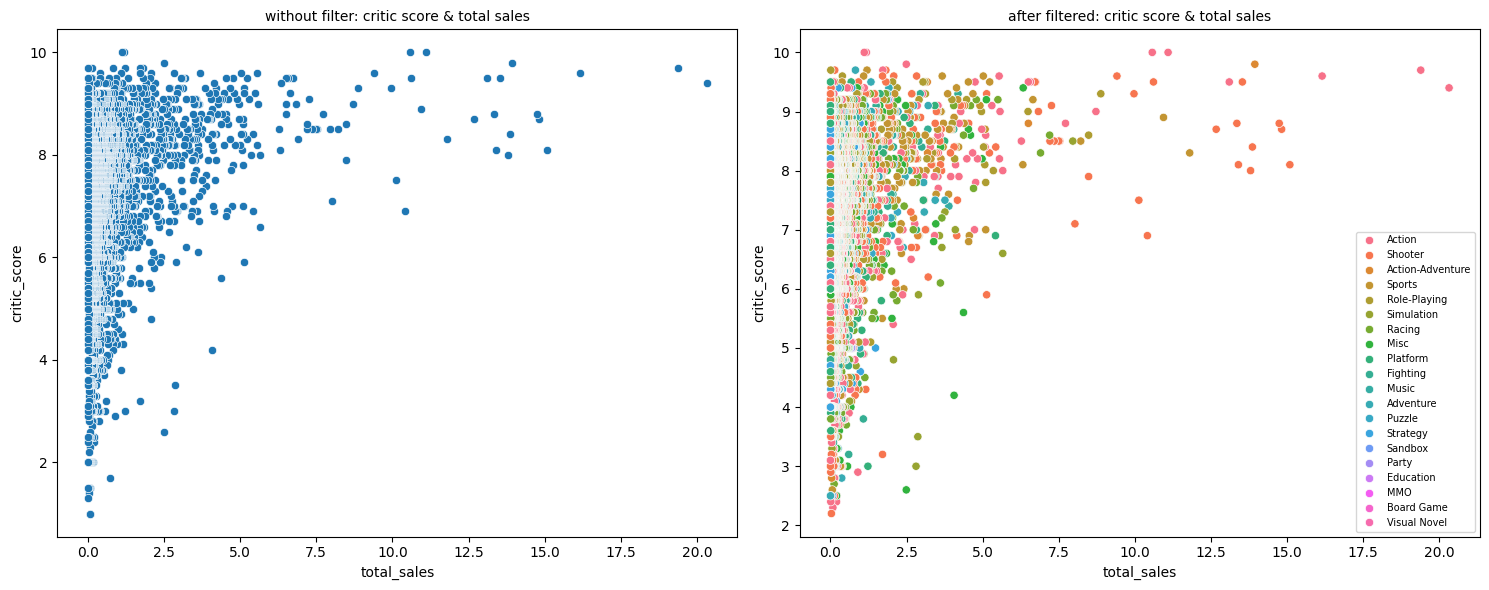

In [33]:
#critic score vs total sales
fig, axes = plt.subplots(1,2, figsize = (15,6))

ax1 = sns.scatterplot(x = 'total_sales', y = 'critic_score',ax = axes[0], data = df)
axes[0].set_title('without filter: critic score & total sales', fontsize= 10)

sns.scatterplot(x = 'total_sales', y = 'critic_score',ax= axes[1], data = df_clean, hue = df_clean['genre'])
axes[1].set_title('after filtered: critic score & total sales', fontsize = 10)
axes[1].legend(prop= {'size': 7})

plt.tight_layout()
plt.show()

In [34]:
#remove null to get covariance value
#total sales
world_sales = df_clean.dropna(subset=['critic_score','total_sales']).reset_index(drop=True)

#us sales
us_sales = df_clean.dropna(subset=['critic_score','na_sales']).reset_index(drop=True)

#japan sales
jp_sales = df_clean.dropna(subset=['critic_score','jp_sales']).reset_index(drop=True)

#euro africa sales
eu_sales = df_clean.dropna(subset=['critic_score','pal_sales']).reset_index(drop=True)

#rest of the world sales
other_sales = df_clean.dropna(subset=['critic_score','other_sales']).reset_index(drop=True)


In [35]:
# data total sales
# covariance value
cov_mat_total_sales_score = np.cov(world_sales.critic_score, world_sales.total_sales)
cov_mat_us_sales_score = np.cov(us_sales.critic_score, us_sales.total_sales)
cov_mat_jp_sales_score = np.cov(jp_sales.critic_score, jp_sales.total_sales)
cov_mat_eu_sales_score = np.cov(eu_sales.critic_score, eu_sales.total_sales)
cov_mat_other_sales_score = np.cov(other_sales.critic_score, other_sales.total_sales)

# pearson correlation 
corr_total_sales_critic_score, p_value = pearsonr(world_sales.total_sales, world_sales.critic_score)
corr_us_sales_critic_score, p_us_value = pearsonr(us_sales.total_sales, us_sales.critic_score)
corr_jp_sales_critic_score, p_jp_value = pearsonr(jp_sales.total_sales, jp_sales.critic_score)
corr_eu_sales_critic_score, p_eu_value = pearsonr(eu_sales.total_sales, eu_sales.critic_score)
corr_other_sales_critic_score, p_other_value = pearsonr(other_sales.total_sales, other_sales.critic_score)


In [36]:
data = {'sales_region':['world sales', 'us', 'japan', 'europe & africa', 'other regions'],
        'covariance_value': [cov_mat_total_sales_score[0,1], cov_mat_us_sales_score[0,1], cov_mat_jp_sales_score[0,1],
                             cov_mat_eu_sales_score[0,1], cov_mat_other_sales_score[0,1] ],
        'correlation_value': [corr_total_sales_critic_score, corr_us_sales_critic_score, 
                              corr_jp_sales_critic_score, corr_eu_sales_critic_score, corr_other_sales_critic_score]}
corr_df = pd.DataFrame(data)
corr_df

,sales_region,covariance_value,correlation_value
0,world sales,0.570313,0.287864
1,us,0.643666,0.312716
2,japan,0.922212,0.359842
3,europe & africa,0.607328,0.295164
4,other regions,0.583692,0.290998


- The above matrix shown this two variable aren't have strong linear association. Event a game score has high rating score, it doesn't affecting the total sales number overall.
- however in us & japan sales, critic score may affect overall performance sincde the correlation value is slightly above 0.3

### console brand vs total sales

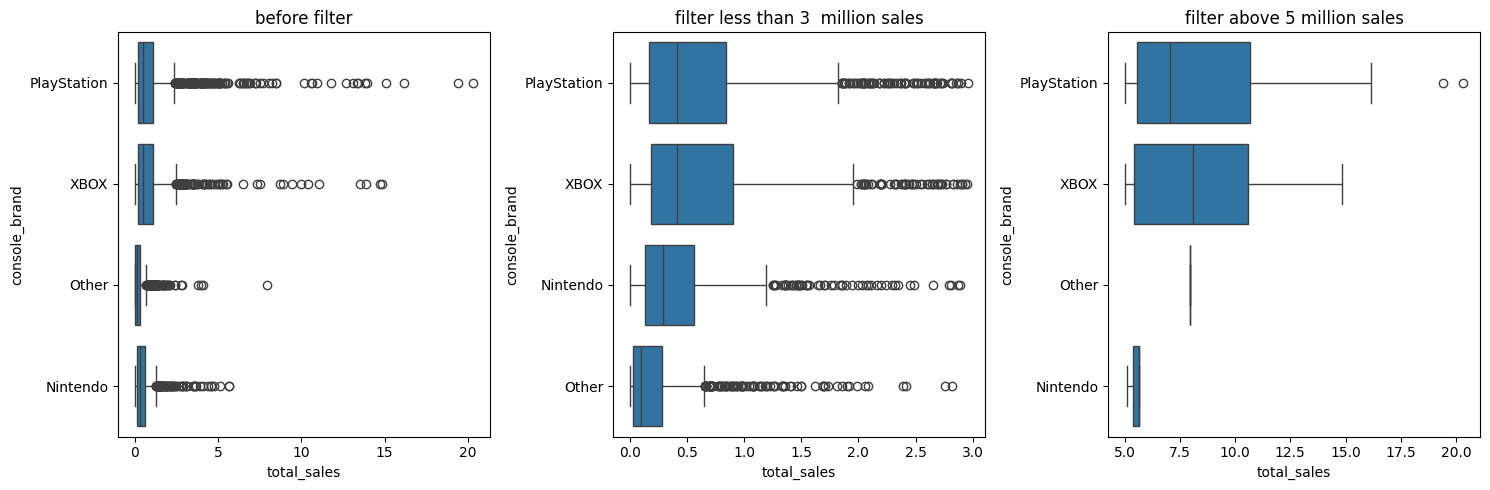

In [37]:
fig, axes = plt.subplots(1,3, figsize = (15, 5))

#before filtering
sns.boxplot(x='total_sales', y = 'console_brand', ax= axes[0],data = df_clean)
axes[0].set_title('before filter')

#filtering high sales value
sns.boxplot(x='total_sales', y = 'console_brand', ax= axes[1],data = df_clean[(df_clean['total_sales']<3)])
axes[1].set_title('filter less than 3  million sales')

#filter low sales value
sns.boxplot(x='total_sales', y = 'console_brand', ax= axes[2],data = df_clean[(df_clean['total_sales']> 5)])
axes[2].set_title('filter above 5 million sales')


plt.tight_layout()
plt.show()

- from the boxplot above, after removing the sales more than 3 million sales, we can see there is small overlap on the median value of each plot for each console brand total sales. 
- in the other case, we visualize sales above 3 million which already indicated as outlier, just to check how the distribution among those numbers.

> Thus we may implied that the console brand less associated to the total sales.

In [38]:
brand_sales = df.groupby('console_brand')['total_sales'].sum().sort_values(ascending=False).reset_index()
brand_sales['total_sales_portion'] = round(brand_sales['total_sales']/ brand_sales['total_sales'].sum(),2)
brand_sales

,console_brand,total_sales,total_sales_portion
0,PlayStation,2997.50,0.50
1,XBOX,1360.62,0.23
2,Nintendo,1137.06,0.19
3,Other,522.28,0.09


In [39]:
brand_game = df['console_brand'].value_counts().reset_index()
brand_game.columns = ['console_brand', 'total_game']
brand_game['total_game_available_portion'] = round(brand_game['total_game']/brand_game['total_game'].sum(),2)
brand_game

,console_brand,total_game,total_game_available_portion
0,PlayStation,6948,0.40
1,Nintendo,4854,0.28
2,Other,3033,0.17
3,XBOX,2662,0.15


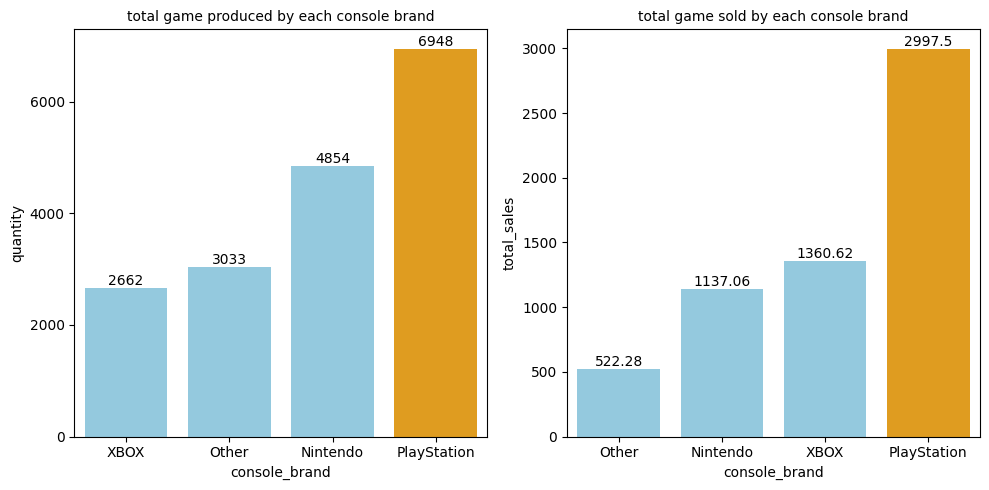

In [72]:
# get distribution of categorical data
fig, axes = plt.subplots(1,2, figsize = (10,5))

# get highest value
max_value = brand_sales['total_sales'].idxmin()
max_game = brand_game['total_game'].idxmin()


# get highlight color
color_console = ['skyblue' if color != max_game else 'orange' for color in range(len(brand_game['console_brand']))]
color_sales = ['skyblue' if color != max_value else 'orange' for color in range(len(brand_sales))]


# total game available for each console brand
ax = sns.countplot(data = df, x='console_brand', ax=axes[0], order = df['console_brand'].value_counts().sort_values().index, palette= color_console)
for i in ax.containers:
    ax.bar_label(i,)
axes[0].set_title('total game produced by each console brand', fontsize = 10)
axes[0].set_ylabel('quantity', fontsize = 10)
#to set range of ticks label
axes[0].set_yticks(np.arange(0,8000, 2000))

# total game sold by each brand
ax1 = sns.barplot(data=brand_sales, x ='console_brand', y='total_sales', ax = axes[1], order= brand_sales.sort_values('total_sales')['console_brand'], palette=color_sales)
for i in ax1.containers:
    ax1.bar_label(i,)
axes[1].set_title('total game sold by each console brand', fontsize = 10)

plt.tight_layout()
plt.show()

### genre vs total sales

In [41]:
df.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,release_year,console_brand
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,2013,PlayStation
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2014,PlayStation
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,2002,PlayStation
3,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,2013,XBOX
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2015,PlayStation


In [42]:
#filter value
action = df_clean.total_sales[df_clean.genre == 'Action']
action_mean = np.mean(action)
action_median = np.median(action)

sport = df_clean.total_sales[df_clean.genre == 'Sports']
sport_mean = np.mean(sport)
sport_median = np.median(sport)

music = df_clean.total_sales[df_clean.genre == 'Music']
music_mean = np.mean(music)
music_median = np.median(music)

print(f"sport genre:\nmean = {round(sport_mean,2)}\nmedian {sport_median}")
print('-'*50)
print(f"action genre:\nmean = {round(action_mean,2)}\nmedian {action_median}")
print('-'*50)
print(f"music genre:\nmean = {round(music_mean,2)}\nmedian {round(music_median,2)}")


sport genre:
mean = 0.92
median 0.43
--------------------------------------------------
action genre:
mean = 0.79
median 0.28
--------------------------------------------------
music genre:
mean = 0.84
median 0.59


> from the above sample comparison, we took highest sold game genre (sport & action) vs music genre, the difference between mean and median is relatively close, which indicated these 2 variables (genre and total sales) is not associated.

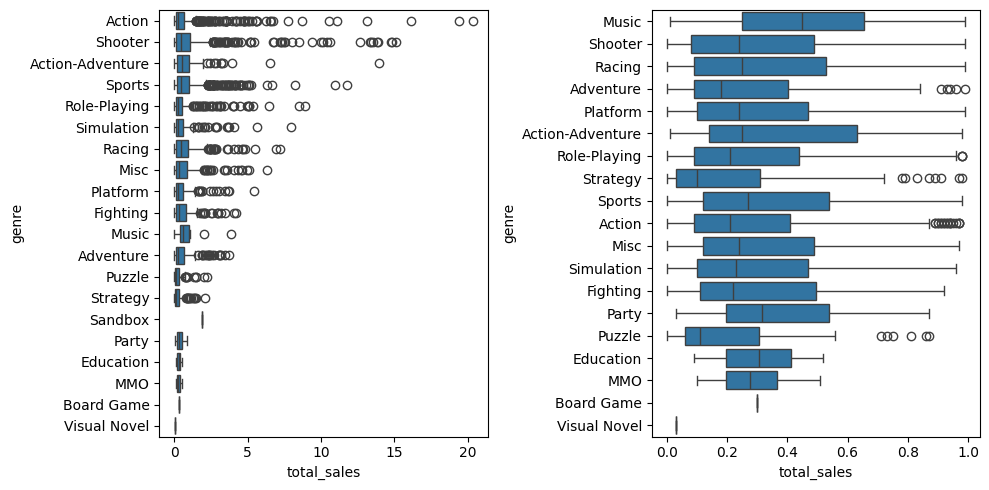

In [43]:
fig, axes = plt.subplots(1,2, figsize = (10,5))

#original dataframe
sns.boxplot(x='total_sales', y='genre',data = df_clean, ax= axes[0])

#after filtering high sales value
sns.boxplot(x='total_sales', y='genre',data = df_clean[df_clean['total_sales']<1], ax= axes[1])


plt.tight_layout()
plt.show()

In [44]:
#data sales by genre
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False).reset_index()
genre_sales

,genre,total_sales
0,Sports,1083.64
1,Action,1048.77
2,Shooter,935.63
3,Misc,527.88
4,Racing,471.49
5,Role-Playing,394.43
6,Adventure,300.14
7,Platform,293.98
8,Simulation,276.87
9,Fighting,266.35


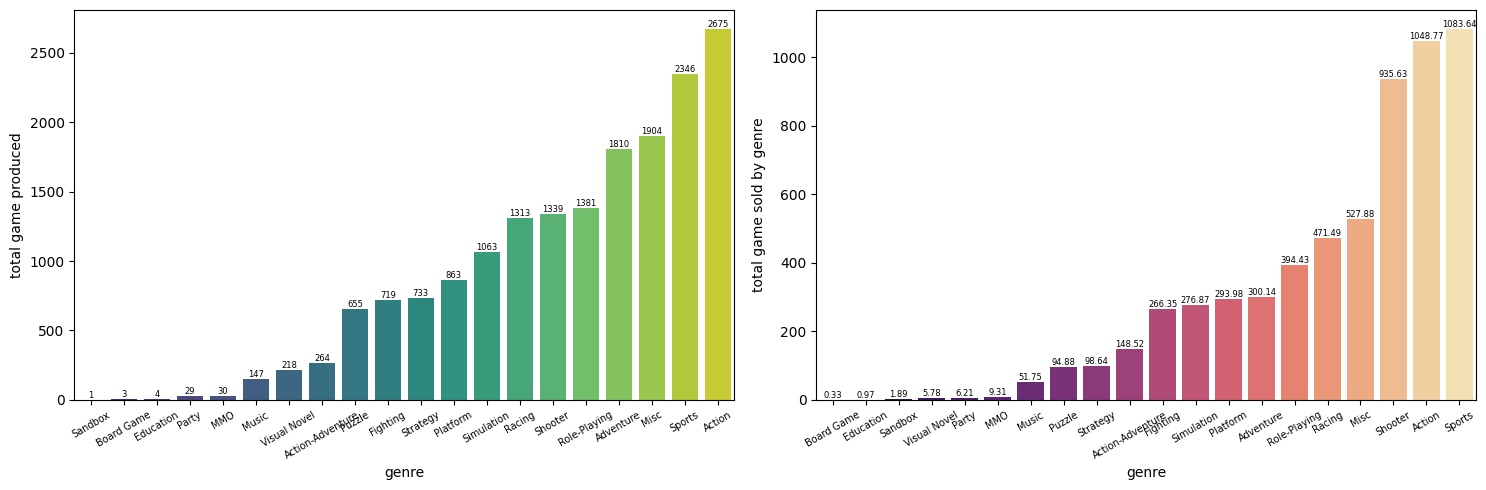

In [45]:
fig, axes = plt.subplots(1,2, figsize= (15,5))

#1
ax0 = sns.countplot(x = 'genre', data = df, palette= 'viridis', ax= axes[0],
              order = df['genre'].value_counts(ascending=True).index)

axes[0].set_ylabel('total game produced')
axes[0].set_xticklabels(axes[0].get_xticklabels(), fontsize = 7, rotation = 30)
for i in ax0.containers:
    ax0.bar_label(i, fontsize = 6)

#2
ax1 = sns.barplot(x = 'genre', y= 'total_sales', data = genre_sales, palette= 'magma', ax = axes[1],
            order = genre_sales.sort_values('total_sales')['genre'])
axes[1].set_xticklabels(axes[1].get_xticklabels(), fontsize = 7, rotation = 30)
axes[1].set_ylabel('total game sold by genre')
for i in ax1.containers:
    ax1.bar_label(i, fontsize = 6)


plt.tight_layout()
plt.show()

# Business Analysis

## Question
1. Which titles sold the most worldwide?

2. Which year had the highest sales? Has the industry grown over time?

3. Do any consoles seem to specialize in a particular genre?

4. What titles are popular in one region but flop in another?

In [47]:
df_clean.sample(3)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,release_year,console_brand
1806,Paper Mario: Color Splash,WiiU,Action-Adventure,Nintendo,Intelligent Systems,7.4,0.87,0.35,0.08,0.37,0.06,2016-10-07,2016,Nintendo
12220,Octomania,Wii,Puzzle,Conspiracy Entertainment,Compile Heart,6.7,0.06,0.06,NaN,0.00,0.00,2008-03-31,2008,Nintendo
3443,FIFA 13,WiiU,Sports,EA Sports,EA Canada,7.0,0.49,0.18,NaN,0.28,0.04,2012-11-18,2012,Nintendo


### 1. Which titles sold the most worldwide

In [48]:
game_sales = df_clean.groupby(['title', 'console','console_brand','release_year'])['total_sales'].sum().sort_values(ascending=False).head(15).reset_index()
game_sales

,title,console,console_brand,release_year,total_sales
0,Grand Theft Auto V,PS3,PlayStation,2013,20.32
1,Grand Theft Auto V,PS4,PlayStation,2014,19.39
2,Grand Theft Auto: Vice City,PS2,PlayStation,2002,16.15
3,Call of Duty: Black Ops 3,PS4,PlayStation,2015,15.09
4,Call of Duty: Modern Warfare 3,X360,XBOX,2011,14.82
5,Call of Duty: Black Ops,X360,XBOX,2010,14.74
6,Red Dead Redemption 2,PS4,PlayStation,2018,13.94
7,Call of Duty: Black Ops II,X360,XBOX,2012,13.86
8,Call of Duty: Black Ops II,PS3,PlayStation,2012,13.80
9,Call of Duty: Modern Warfare 2,X360,XBOX,2009,13.53


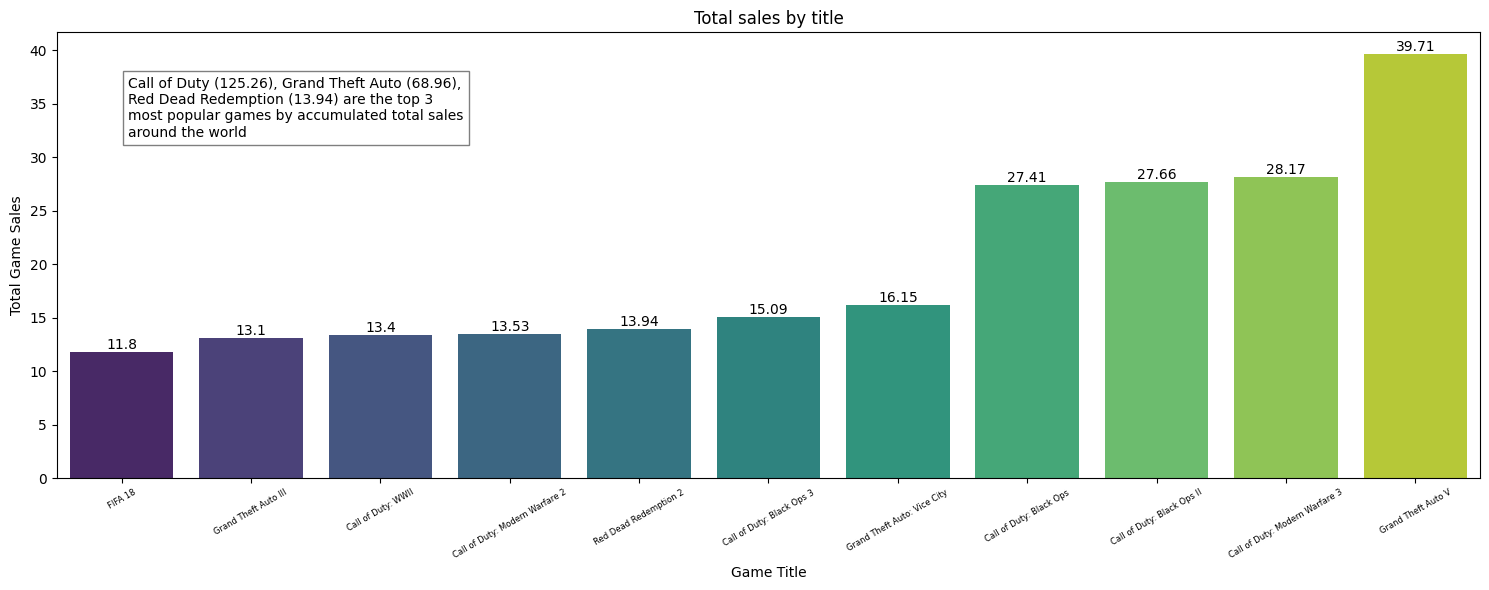

In [49]:
fig = plt.figure(figsize=(15,6))

sales_by_title = game_sales.groupby('title')['total_sales'].sum().reset_index()
gta = sales_by_title[sales_by_title['title'].str.contains('Grand Theft', case = False, na = False)].sum()
cod = sales_by_title[sales_by_title['title'].str.contains('Call of Duty', case = False, na = False)].sum()
red = sales_by_title[sales_by_title['title'].str.contains('Red Dead', case = False, na = False)].sum()

ax = sns.barplot(x = 'title', y = 'total_sales', data = sales_by_title, order = sales_by_title.sort_values('total_sales')['title'], palette = 'viridis')
ax.tick_params(axis= 'x', labelsize = 6, rotation = 30)

summary = f'Call of Duty ({round(cod['total_sales'],2)}), Grand Theft Auto ({round(gta['total_sales'],2)}),\nRed Dead Redemption ({round(red['total_sales'],2)}) are the top 3\nmost popular games by accumulated total sales\naround the world'
ax.text(0.05, 0.90, summary, transform = ax.transAxes,
        verticalalignment = 'top', bbox= dict(facecolor= "white", alpha = 0.5))
plt.title("Total sales by title", loc= 'center', fontsize = 12)
ax.set_ylabel('Total Game Sales')
ax.set_xlabel('Game Title')

for i in ax.containers:
    ax.bar_label(i,)
    
plt.tight_layout()
plt.show()

- `Grand Theft Auto V` is the most sold video games with total 39.71 million copies.
- meanwhile, by `video game series worldwide sales` is led by `Call of Duty`.

### 2. Which year had the highest sales? Has the industry grown over time?

In [50]:
df_clean.sample(2)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,release_year,console_brand
7321,Dinotopia: The Timestone Pirates,GBA,Action,TDK Core,TDK Mediactive,6.1,0.19,0.14,NaN,0.05,0.0,2002-04-30,2002,Other
8249,Killer7,GC,Action,Capcom,Grasshopper Manufacture,7.2,0.15,0.12,NaN,0.03,0.0,2005-07-07,2005,Other


In [51]:
df_clean.isna().sum()

title               0
console             0
genre               0
publisher           0
developer           0
critic_score        0
total_sales         0
na_sales          354
jp_sales         2608
pal_sales         319
other_sales       104
release_date        0
release_year        0
console_brand       0
dtype: int64

In [52]:
sales_over_year = df_clean.groupby('release_year')['total_sales'].sum().sort_index().reset_index()
sales_over_year

,release_year,total_sales
0,1999,62.86
1,2000,55.31
2,2001,82.95
3,2002,123.31
4,2003,107.54
5,2004,87.41
6,2005,142.32
7,2006,152.36
8,2007,226.49
9,2008,293.00


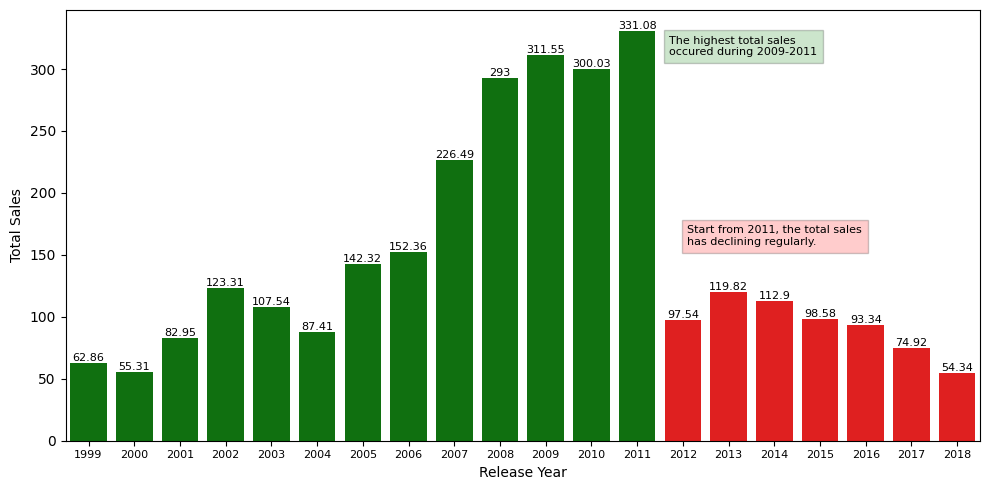

In [53]:
fig = plt.figure(figsize = (10,5))

#get filtered year
year = [x for x in sales_over_year['release_year'] if x> 2011]
#set bar color
bar_color = ['red' if x in year else 'green' for x in sales_over_year['release_year']]


ax = sns.barplot(data = sales_over_year, x ='release_year', y = 'total_sales', palette= bar_color)
plt.tick_params(axis= 'x', labelsize = 8)
ax.set_xlabel('Release Year')
ax.set_ylabel('Total Sales')
for i in ax.containers:
    ax.bar_label(i, fontsize = 8)

summary= 'Start from 2011, the total sales\nhas declining regularly.'
plt.text(0.68, 0.50, summary, transform = ax.transAxes,fontsize = 8,
         verticalalignment = 'top', bbox = dict(facecolor = 'red', alpha = 0.2))

summary2= 'The highest total sales\noccured during 2009-2011'
plt.text(0.66, 0.94, summary2, transform = ax.transAxes, fontsize = 8,
         verticalalignment = 'top', bbox = dict(facecolor = 'green', alpha = 0.2))


plt.tight_layout()
plt.show()

- The peak sales occured during 2009 - 2011 periods.
- however, after aforementioned period, the video game sales is declining.

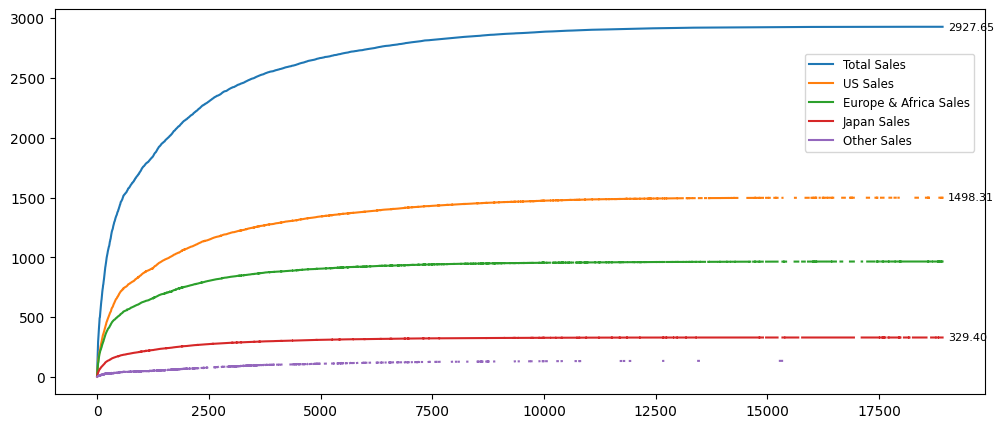

In [54]:
fig = plt.figure(figsize=(12, 5))

# Plot each region sales
for column in ['total_sales', 'na_sales', 'pal_sales', 'other_sales', 'jp_sales']:
    cumulative_sum = df_clean[column].sort_index().cumsum()
    cumulative_sum.plot()
    
    # set the value label of each sales
    plt.annotate(f'{cumulative_sum.iloc[-1]:.2f}', 
                  xy=(cumulative_sum.index[-1], cumulative_sum.iloc[-1]),
                  xytext=(4, 0),
                  textcoords='offset points',
                  ha='left', va='center',
                  fontsize = 8)

# set the legend position
plt.legend(labels = ['Total Sales', 'US Sales', 'Europe & Africa Sales', 'Japan Sales', 'Other Sales'],bbox_to_anchor=(0.8, 0.90), loc='upper left', fontsize = 8.5)

plt.show()

> from the cumulative plot, it shown similar trend. and also we can see there are plenty missing data points within the data sales for each regions, besides the total sales

### 3. Do any console seem to specialize in a particular genre?

In [55]:
df_clean.head()

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,release_year,console_brand
0,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,2013,PlayStation
1,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2014,PlayStation
2,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,2002,PlayStation
4,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2015,PlayStation
5,Call of Duty: Modern Warfare 3,X360,Shooter,Activision,Infinity Ward,8.7,14.82,9.07,0.13,4.29,1.33,2011-11-08,2011,XBOX


In [56]:
genre_by_console = (
    df_clean.groupby(['console_brand','genre'])['title'].count()
    .reset_index()
    .sort_values(['console_brand', 'title'], ascending=[True, False])
    .reset_index(drop = True))
genre_by_console

,console_brand,genre,title
0,Nintendo,Action,152
1,Nintendo,Role-Playing,103
2,Nintendo,Sports,80
3,Nintendo,Platform,79
4,Nintendo,Misc,66
...,...,...,...
60,XBOX,Simulation,17
61,XBOX,Strategy,16
62,XBOX,Music,5
63,XBOX,Puzzle,4


In [57]:
top_5_brand_genre = (
    genre_by_console.groupby('console_brand')
    .head(5)
    .reset_index(drop=True)
    .rename(columns={'title':'total_games'})
)
top_5_brand_genre

,console_brand,genre,total_games
0,Nintendo,Action,152
1,Nintendo,Role-Playing,103
2,Nintendo,Sports,80
3,Nintendo,Platform,79
4,Nintendo,Misc,66
5,Other,Action,156
6,Other,Shooter,131
7,Other,Sports,108
8,Other,Platform,101
9,Other,Role-Playing,101


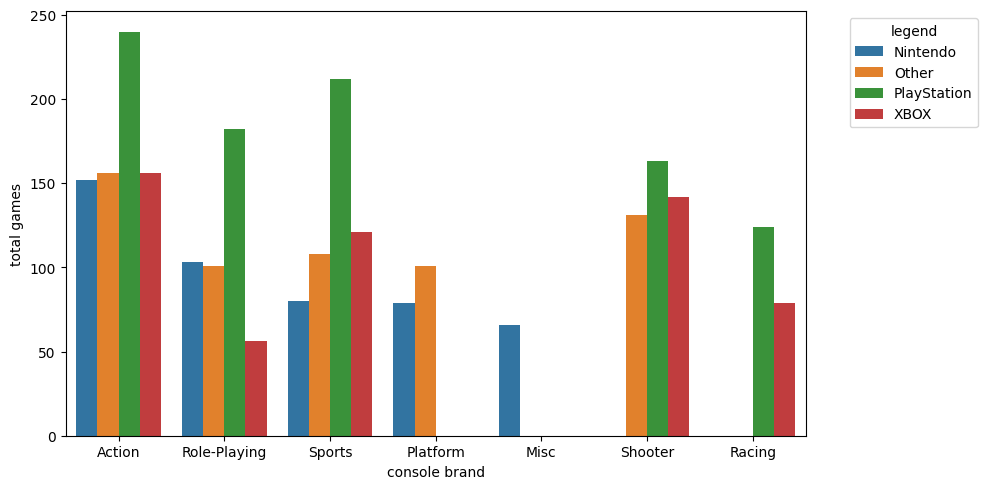

In [58]:
fig = plt.figure(figsize=(10,5))

ax = sns.barplot(data = top_5_brand_genre,x= 'genre', y ='total_games', hue= 'console_brand')
ax.set_xlabel('console brand')
ax.set_ylabel('total games')

plt.legend(title ='legend', bbox_to_anchor=(1.05,1), loc = 'upper left')

plt.tight_layout()
plt.show()

> since we already observes that action and sports are few of most popular genre throughout the sales, all consoles seems aren't specialized in certain genre..

> Meanwhile, from the overall aspect, Playstation are dominating in all game genres, competing with Xbox in all other genres.

### 4. What titles are popular in one region but flop in another?

> We may consider to lookup the most sold game worldwide, in order to narrow the observations object.

Then we can compare each of the game title total sales for each region

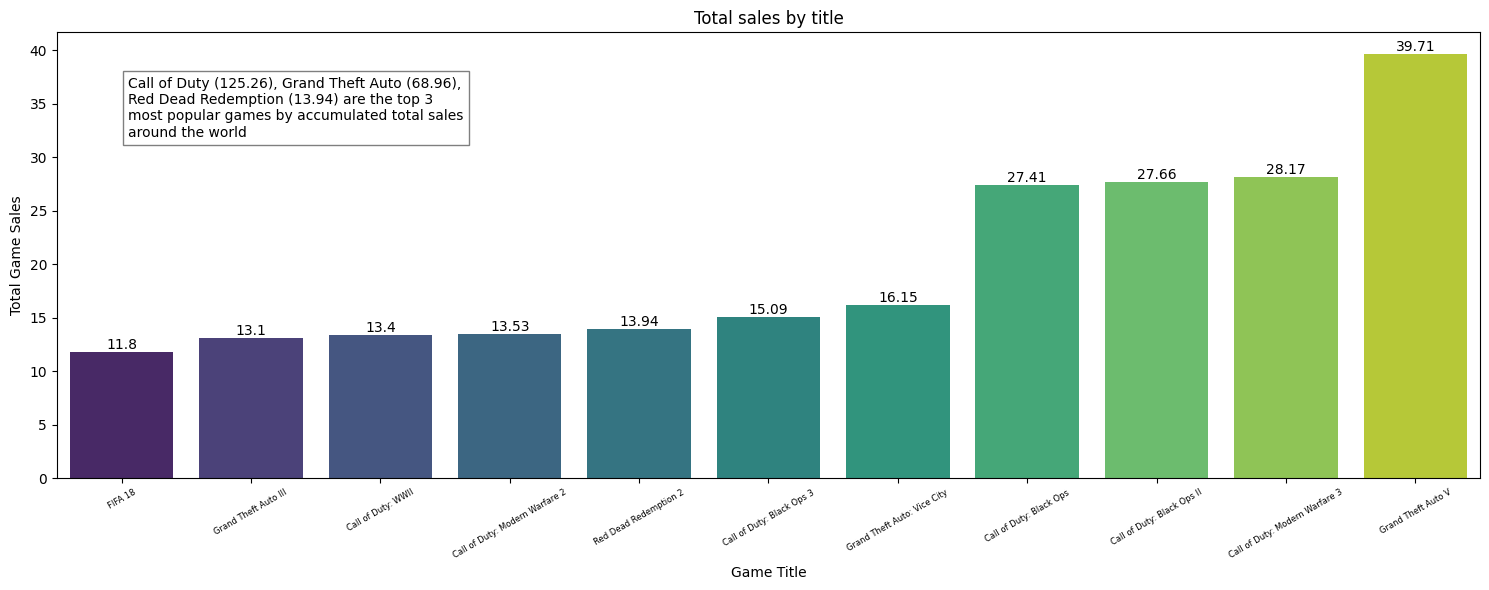

In [59]:
fig = plt.figure(figsize=(15,6))

sales_by_title = game_sales.groupby('title')['total_sales'].sum().reset_index()
gta = sales_by_title[sales_by_title['title'].str.contains('Grand Theft', case = False, na = False)].sum()
cod = sales_by_title[sales_by_title['title'].str.contains('Call of Duty', case = False, na = False)].sum()
red = sales_by_title[sales_by_title['title'].str.contains('Red Dead', case = False, na = False)].sum()

ax = sns.barplot(x = 'title', y = 'total_sales', data = sales_by_title, order = sales_by_title.sort_values('total_sales')['title'], palette = 'viridis')
ax.tick_params(axis= 'x', labelsize = 6, rotation = 30)

summary = f'Call of Duty ({round(cod['total_sales'],2)}), Grand Theft Auto ({round(gta['total_sales'],2)}),\nRed Dead Redemption ({round(red['total_sales'],2)}) are the top 3\nmost popular games by accumulated total sales\naround the world'
ax.text(0.05, 0.90, summary, transform = ax.transAxes,
        verticalalignment = 'top', bbox= dict(facecolor= "white", alpha = 0.5))
plt.title("Total sales by title", loc= 'center', fontsize = 12)
ax.set_ylabel('Total Game Sales')
ax.set_xlabel('Game Title')

for i in ax.containers:
    ax.bar_label(i,)
    
plt.tight_layout()
plt.show()

In [60]:
game_sales

,title,console,console_brand,release_year,total_sales
0,Grand Theft Auto V,PS3,PlayStation,2013,20.32
1,Grand Theft Auto V,PS4,PlayStation,2014,19.39
2,Grand Theft Auto: Vice City,PS2,PlayStation,2002,16.15
3,Call of Duty: Black Ops 3,PS4,PlayStation,2015,15.09
4,Call of Duty: Modern Warfare 3,X360,XBOX,2011,14.82
5,Call of Duty: Black Ops,X360,XBOX,2010,14.74
6,Red Dead Redemption 2,PS4,PlayStation,2018,13.94
7,Call of Duty: Black Ops II,X360,XBOX,2012,13.86
8,Call of Duty: Black Ops II,PS3,PlayStation,2012,13.80
9,Call of Duty: Modern Warfare 2,X360,XBOX,2009,13.53


In [61]:
df_title = df_clean[
    df['title'].str.contains('Grand Theft', case = False, na = False)|
    df['title'].str.contains('Call of Duty', case = False, na = False)|
    df['title'].str.contains('Read Dead', case = False, na = False)
                    ][['title', 'total_sales','na_sales', 'jp_sales', 'pal_sales', 'other_sales']].reset_index(drop=True)

In [62]:
print(f'before remove null: {len(df_title)}')
df_title.dropna(how='any', inplace=True)

print(f'after remove null: {len(df_title)}')

before remove null: 79
after remove null: 42


In [63]:
df_title.head()

,title,total_sales,na_sales,jp_sales,pal_sales,other_sales
0,Grand Theft Auto V,20.32,6.37,0.99,9.85,3.12
1,Grand Theft Auto V,19.39,6.06,0.60,9.71,3.02
2,Grand Theft Auto: Vice City,16.15,8.41,0.47,5.49,1.78
3,Call of Duty: Black Ops 3,15.09,6.18,0.41,6.05,2.44
4,Call of Duty: Modern Warfare 3,14.82,9.07,0.13,4.29,1.33


In [64]:
#get each unique title total sales per region
region_sales = df_title.groupby('title')[['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum().sort_values('total_sales', ascending = False).reset_index()
region_sales

,title,total_sales,na_sales,jp_sales,pal_sales,other_sales
0,Grand Theft Auto V,48.43,17.13,1.60,22.81,6.90
1,Call of Duty: Modern Warfare 3,28.17,14.61,0.62,10.07,2.87
2,Call of Duty: Black Ops II,27.66,13.26,0.72,10.20,3.48
3,Call of Duty: Black Ops,27.41,15.77,0.59,8.13,2.92
4,Call of Duty: Ghosts,25.06,12.88,0.49,8.38,3.32
5,Call of Duty: Modern Warfare 2,24.14,13.53,0.46,7.29,2.87
6,Grand Theft Auto IV,21.66,11.59,0.58,6.84,2.66
7,Call of Duty: Advanced Warfare,21.36,10.49,0.35,7.77,2.78
8,Call of Duty 4: Modern Warfare,17.18,10.06,0.42,4.68,2.03
9,Grand Theft Auto: Vice City,16.15,8.41,0.47,5.49,1.78


> for the most part, the sales within japan region is flop

> at the other hand, america and europe region is where the total sales genereted as the sales backbone

In [65]:
#convert into percentage

region_sales.insert(3, 'na_percent_sales', round(region_sales['na_sales']/region_sales['total_sales'],2))
region_sales.insert(4, 'pal_percent_sales', round(region_sales['pal_sales']/region_sales['total_sales'],2))
region_sales.insert(5, 'jp_percent_sales', round(region_sales['jp_sales']/region_sales['total_sales'],2))
region_sales.insert(6, 'other_percent_sales', round(region_sales['other_sales']/region_sales['total_sales'],2))

In [66]:
region_sales.drop(['jp_sales', 'na_sales', 'pal_sales', 'other_sales'], axis=1, inplace=True)
region_sales

,title,total_sales,na_percent_sales,pal_percent_sales,jp_percent_sales,other_percent_sales
0,Grand Theft Auto V,48.43,0.35,0.47,0.03,0.14
1,Call of Duty: Modern Warfare 3,28.17,0.52,0.36,0.02,0.10
2,Call of Duty: Black Ops II,27.66,0.48,0.37,0.03,0.13
3,Call of Duty: Black Ops,27.41,0.58,0.30,0.02,0.11
4,Call of Duty: Ghosts,25.06,0.51,0.33,0.02,0.13
5,Call of Duty: Modern Warfare 2,24.14,0.56,0.30,0.02,0.12
6,Grand Theft Auto IV,21.66,0.54,0.32,0.03,0.12
7,Call of Duty: Advanced Warfare,21.36,0.49,0.36,0.02,0.13
8,Call of Duty 4: Modern Warfare,17.18,0.59,0.27,0.02,0.12
9,Grand Theft Auto: Vice City,16.15,0.52,0.34,0.03,0.11


In [67]:
region_sales.set_index('title', inplace=True)

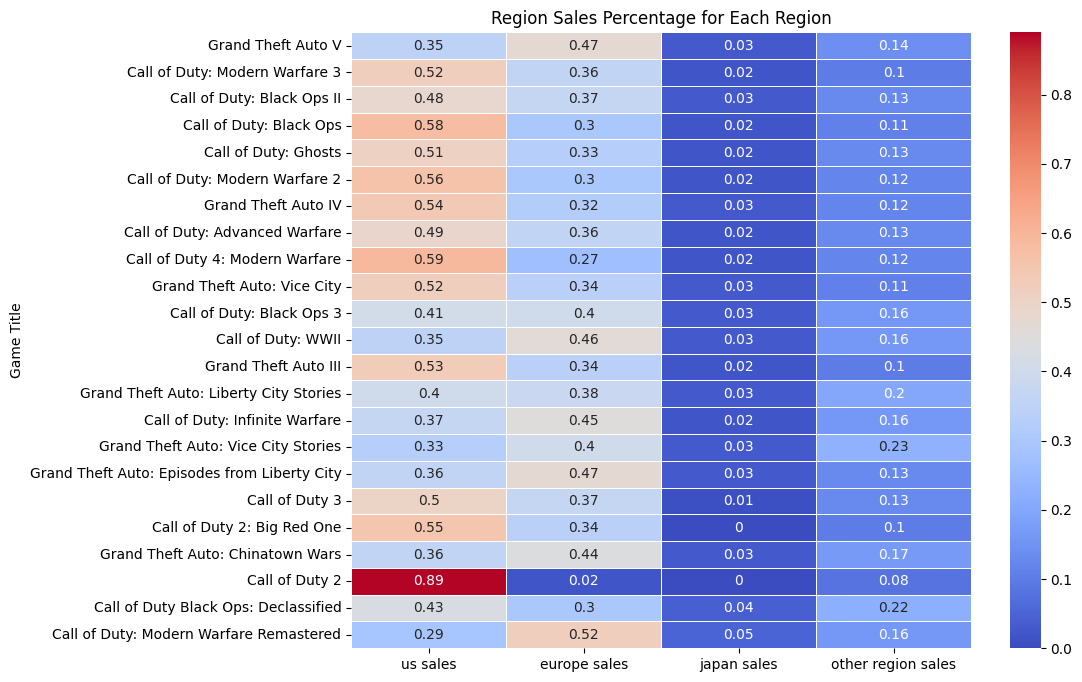

In [68]:
# Select only the sales percentage columns for the heatmap
heatmap_data = region_sales[['na_percent_sales', 'pal_percent_sales', 'jp_percent_sales', 'other_percent_sales']]

# Create the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=0.5)
ax.set_xticklabels(['us sales', 'europe sales', 'japan sales', 'other region sales'])

plt.title('Region Sales Percentage for Each Region')
plt.ylabel('Game Title')
plt.show()

> as mentioned before, europe and us sales are the majority total sales came from. For most of game sales are led by us region, however we can see that in particular game, europe sales also dominating the us region

> GTA V, CoD: WWII, GTA: liberty city & GTA: Chinatown Warse is where Europe outperform region in sales

> meanwhile, the obvious flop for Europe is on the COD 2 which highly dominated by US region


### Further Notes:

The result of the exploration and anlysis are not reflecting real world condition, since many consideration of data filtering and data availability.
Futher analysis can be explored through different approach and method. While also, this observation is focus on step by step data analysis process and visualization focus. Thank you.